In [3]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import json
from matplotlib import pyplot as plt

### State and district -wise current info

In [ ]:
url = 'https://api.covid19india.org/state_district_wise.json'

In [ ]:
response = urllib.request.urlopen(url)

In [ ]:
data = json.loads(response.read())

In [ ]:
data['Kerala']['districtData']['Kollam']['active']

### Time-series info state-wise

In [ ]:
url_time_series = 'https://api.covid19india.org/v3/timeseries.json'

In [ ]:
response = urllib.request.urlopen(url_time_series)

In [ ]:
data = json.loads(response.read())

In [ ]:
data['MH']

In [ ]:
data['MH']['2020-04-09']['total']

In [ ]:
data['MH']['2020-04-09']['delta']

In [ ]:
active = []
for key_date in data['MH']:
    if (len(data['MH'][str(key_date)]['total']) == 1):
        active.append(data['MH'][str(key_date)]['total']['confirmed'])
    else:
        active.append(data['MH'][str(key_date)]['total']['confirmed'] - (data['MH'][str(key_date)]['total']['recovered'] + data['MH'][str(key_date)]['total']['deceased']))

In [ ]:
print(active)

In [ ]:
plt.plot(active)
plt.show()

### Time series data for India

In [1]:
url_time_series = 'https://api.covid19india.org/data.json'

In [4]:
response = urllib.request.urlopen(url_time_series)

In [5]:
data = json.loads(response.read())

In [16]:
data

{'cases_time_series': [{'dailyconfirmed': '1',
   'dailydeceased': '0',
   'dailyrecovered': '0',
   'date': '30 January ',
   'totalconfirmed': '1',
   'totaldeceased': '0',
   'totalrecovered': '0'},
  {'dailyconfirmed': '0',
   'dailydeceased': '0',
   'dailyrecovered': '0',
   'date': '31 January ',
   'totalconfirmed': '1',
   'totaldeceased': '0',
   'totalrecovered': '0'},
  {'dailyconfirmed': '0',
   'dailydeceased': '0',
   'dailyrecovered': '0',
   'date': '01 February ',
   'totalconfirmed': '1',
   'totaldeceased': '0',
   'totalrecovered': '0'},
  {'dailyconfirmed': '1',
   'dailydeceased': '0',
   'dailyrecovered': '0',
   'date': '02 February ',
   'totalconfirmed': '2',
   'totaldeceased': '0',
   'totalrecovered': '0'},
  {'dailyconfirmed': '1',
   'dailydeceased': '0',
   'dailyrecovered': '0',
   'date': '03 February ',
   'totalconfirmed': '3',
   'totaldeceased': '0',
   'totalrecovered': '0'},
  {'dailyconfirmed': '0',
   'dailydeceased': '0',
   'dailyrecovered':

In [6]:
active = []
tc = []
td = []
tr = []
for i in data['cases_time_series']:
    active.append(int(i['totalconfirmed']) - (int(i['totaldeceased']) + int(i['totalrecovered'])))
    tc.append(int(i['totalconfirmed']))
    td.append(int(i['totaldeceased']))
    tr.append(int(i['totalrecovered']))

In [7]:
tc

[1,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 6,
 28,
 30,
 31,
 34,
 39,
 48,
 63,
 71,
 81,
 91,
 102,
 112,
 126,
 146,
 171,
 198,
 256,
 334,
 403,
 497,
 571,
 657,
 730,
 883,
 1019,
 1139,
 1326,
 1635,
 2059,
 2545,
 3105,
 3684,
 4293,
 4777,
 5350,
 5915,
 6728,
 7599,
 8453,
 9211,
 10454,
 11485,
 12371,
 13432,
 14354,
 15725,
 17305,
 18544,
 20081,
 21373,
 23040,
 24448,
 26283,
 27890,
 29458,
 31360,
 33065,
 34866,
 37262,
 39826,
 42778,
 46434,
 49405,
 53007,
 56351,
 59690,
 62865,
 67176,
 70768,
 74330,
 78056,
 82047,
 85855,
 90649,
 95698,
 100326,
 106480,
 112200,
 118223,
 124759,
 131424,
 138537,
 144951,
 150858,
 158104,
 165358,
 173496,
 181860,
 190649,
 198372,
 207187,
 216876,
 226723,
 236195,
 246603,
 257485,
 266021,
 276002,
 287158,
 298293,
 309603]

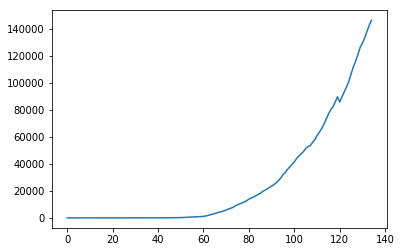

In [8]:
plt.plot(active)
plt.show()

### Prediction

In [11]:
active_train = active[0:100]
tc_train = tc[0:100]
td_train = td[0:100]
tr_train = tr[0:100]

In [10]:
len(active_train)

100

In [ ]:
# Autoregression

from statsmodels.tsa.ar_model import AutoReg
from random import random

model = AutoReg(active_train, lags=1)
model_fit = model.fit()

yhat = model_fit.predict(len(active_train), len(active_train))
print(yhat)

In [28]:
active[100]

41463

In [ ]:
# Moving Average

from statsmodels.tsa.arima_model import ARMA
model = ARMA(active_train, order=(0, 4))
model_fit = model.fit(disp=False)

yhat = model_fit.predict(len(active_train), len(active_train))
print(yhat)

In [ ]:
# ARMA

from statsmodels.tsa.arima_model import ARMA
model = ARMA(active_train, order=(0, 4))
model_fit = model.fit(disp=False)

yhat = model_fit.predict(len(active_train), len(active_train))
print(yhat)

In [12]:
# VARMA

from statsmodels.tsa.statespace.varmax import VARMAX
data_varma = list()
for i in range(100):
    v1 = tc[i]
    v2 = tr[i]
    v3 = td[i]
    row = [v1, v2, v3]
    data_varma.append(row)

In [13]:
for j in range(100):
    data_varma[j] = [float(i) for i in data_varma[j]]

In [ ]:
data_varma

In [25]:
model = VARMAX(data_varma, order=(1, 2))
model_fit = model.fit(disp=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [26]:
yhat = model_fit.forecast()
print(yhat)

[[63001.38412086 18955.20226072  2124.35269569]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


In [27]:
yhat[0][0] - (yhat[0][1] + yhat[0][2])

41921.82916444671

In [37]:
# VARMAX

from statsmodels.tsa.statespace.varmax import VARMAX
from random import random

data_varmax = list()
for i in range(100):
    v1 = tc[i]
    v2 = tr[i]
    v3 = td[i]
    row = [v1, v2, v3]
    data_varmax.append(row)
    
for j in range(100):
    data_varmax[j] = [float(i) for i in data_varmax[j]]
    
data_exog = [x + random() for x in range(100)]
model = VARMAX(data_varmax, exog=data_exog, order=(2, 2))
model_fit = model.fit(disp=False)

data_exog2 = [[100]]
yhat = model_fit.forecast(exog=data_exog2)
print(yhat)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


[[64795.90004405 19528.15391825  2138.91170128]]


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


In [38]:
yhat[0][0] - (yhat[0][1] + yhat[0][2])

43128.834424527246

In [39]:
# Simple Exponential smoothing

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(active_train)
model_fit = model.fit()

yhat = model_fit.predict(len(active_train), len(active_train))
print(yhat)

[39817.]


In [43]:
active[100]

41463

In [47]:
# HWES

from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(active_train)
model_fit = model.fit()

yhat = model_fit.predict(len(active_train), len(active_train))
print(yhat)

[39817.]
